# Classificação Binária com Regressão Logística no Dataset Iris

## **Objetivo da Aula**

Apresentar o conceito e a aplicação prática de classificação binária utilizando o algoritmo de **Regressão Logística** no famoso conjunto de dados **Iris**, explorando desde o carregamento dos dados até a avaliação do modelo.

## **1. Introdução ao Problema**

O dataset **Iris** é um clássico na área de Machine Learning. Ele contém 150 amostras de flores, cada uma pertencente a uma das três espécies:

- **Setosa (classe 0)**
- **Versicolor (classe 1)**
- **Virginica (classe 2)**

Cada amostra possui 4 características (features):

1. Comprimento da sépala
2. Largura da sépala
3. Comprimento da pétala
4. Largura da pétala

Neste exemplo, faremos uma **classificação binária**, ou seja, queremos identificar se uma flor é **Setosa** (`classe 0`) ou **não Setosa** (`classes 1 e 2`).

## **2. Importações Necessárias**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**Explicação das Bibliotecas:**

- **`numpy`**: Usado para operações numéricas.
- **`load_iris`**: Carrega o dataset Iris.
- **`train_test_split`**: Divide os dados em conjuntos de treino e teste.
- **`LogisticRegression`**: Modelo de regressão logística usado para classificação.
- **`accuracy_score`**: Métrica que avalia a acurácia do modelo.

## **3. Carregando o Dataset Iris**

In [15]:
iris = load_iris()
X = iris.data  # 4 features
y = iris.target  # 3 classes (0,1,2)

- `X`: Matriz de características (150 amostras × 4 features).
- `y`: Vetor de rótulos originais (valores 0, 1 e 2).

## **4. Transformação para Classificação Binária**

In [16]:
y_binary = (y == 0).astype(int)

**O que está acontecendo aqui?**

- Estamos criando uma nova variável `y_binary`, onde:
  - Se `y == 0` (Setosa), retorna `True (1)`
  - Caso contrário, retorna `False (0)`
- Assim, agora temos um problema de **classificação binária**:
  - Classe positiva: **Setosa (1)**
  - Classe negativa: **Não Setosa (0)**

### **4.1 Visualização para análise exploratória**

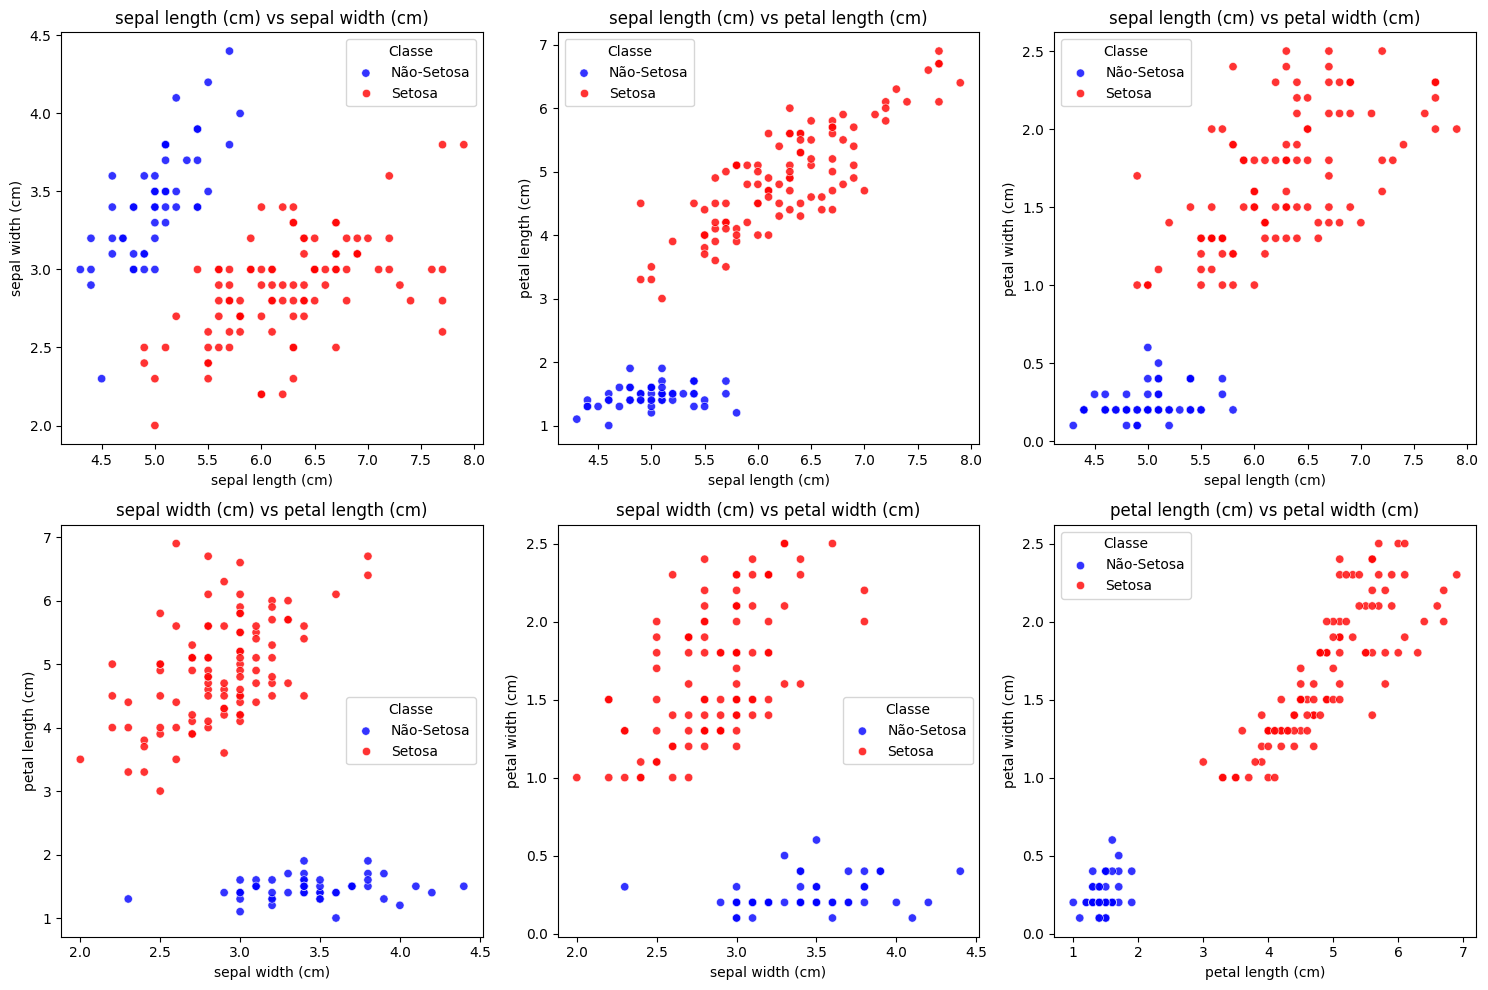

In [21]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['class_name'] = df['target'].apply(lambda x: iris.target_names[x])
df['binary_class'] = y_binary  # 1 para Setosa, 0 para Não-Setosa
df['binary_label'] = df['binary_class'].map({0: 'Não-Setosa', 1: 'Setosa'})

# Configuração das cores por classe
palette = {0: "red", 1: "blue"}
class_labels = {0: 'Não-Setosa', 1: 'Setosa'}

# Plotar gráficos de dispersão para pares de features
features = iris.feature_names
num_features = len(features)

plt.figure(figsize=(15, 10))
plot_index = 1

for i in range(num_features):
    for j in range(i + 1, num_features):
        plt.subplot(2, 3, plot_index)
        sns.scatterplot(data=df, x=features[i], y=features[j], hue='binary_class', palette=palette, alpha=0.8)
        plt.title(f'{features[i]} vs {features[j]}')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.legend(title="Classe", labels=[class_labels[0], class_labels[1]])
        plot_index += 1

plt.tight_layout()
plt.show()

**🔍 Explicação das Visualizações**

- **DataFrame com informações nomeadas:** Facilita a interpretação dos gráficos.
- **Gráficos de dispersão entre pares de features:**
  - Mostram como os dados estão distribuídos entre diferentes combinações de características.
  - Pontos coloridos representam as duas classes:
    - **Azul**: Setosa (classe 1)
    - **Vermelho**: Não-Setosa (classe 0)
- **Objetivo das visualizações:**
  - Verificar se existe uma **separação visível** entre as classes.
  - Entender quais **pares de features** são mais úteis para a classificação.

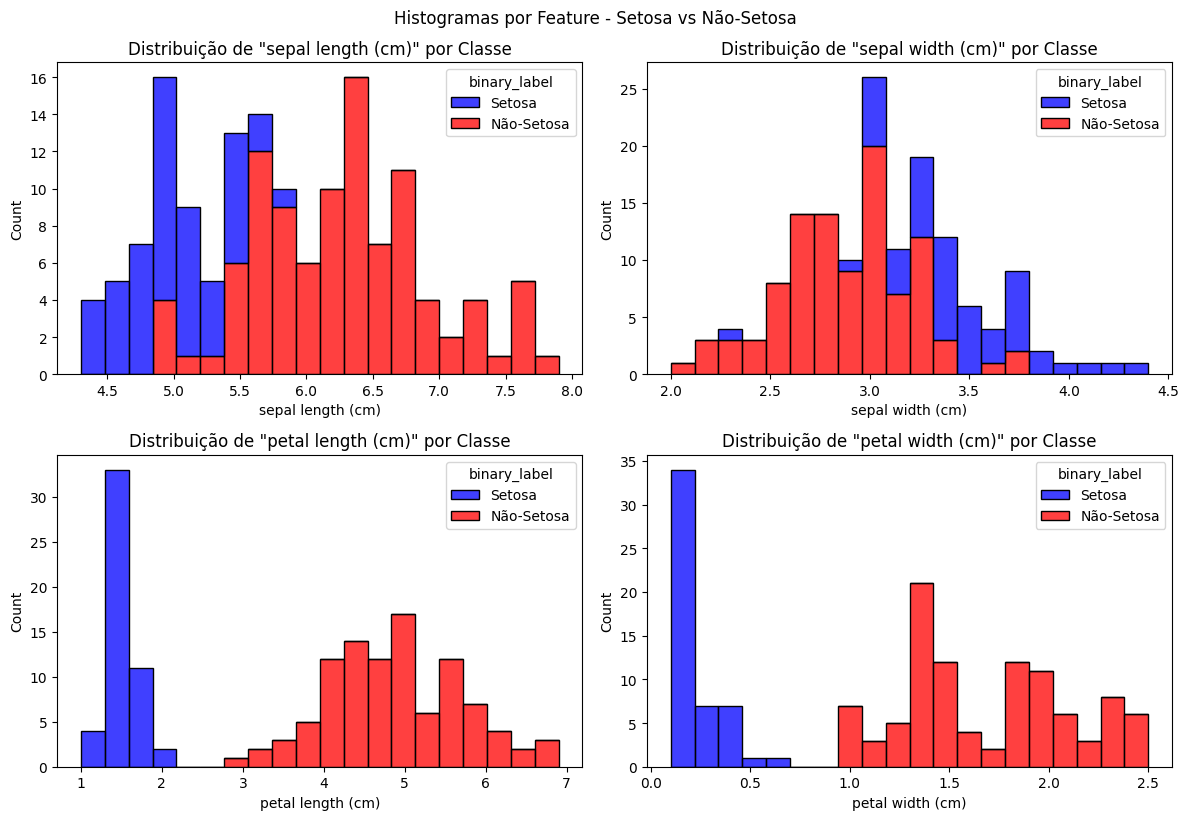

In [24]:
# === Histogramas por Feature ===
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, feature in enumerate(iris.feature_names):
    sns.histplot(data=df, x=feature, hue='binary_label', ax=axes[idx], multiple='stack', bins=20, palette=palette)
    axes[idx].set_title(f'Distribuição de "{feature}" por Classe')

plt.tight_layout()
plt.suptitle('Histogramas por Feature - Setosa vs Não-Setosa', y=1.02)
plt.show()



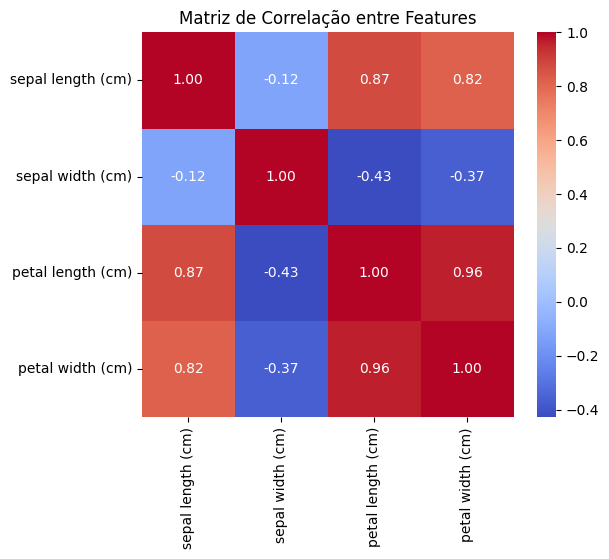

In [25]:
# === Matriz de Correlação das Features ===
plt.figure(figsize=(6, 5))
corr_matrix = df[iris.feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Features')
plt.show()

## **5. Dividindo os Dados em Treino e Teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, random_state=42
)

**Parâmetros:**

- `test_size=0.3`: 30% dos dados serão usados para teste.
- `random_state=42`: Garante reprodutibilidade da divisão.

**Resultado:**

- `X_train`, `y_train`: Dados de treinamento
- `X_test`, `y_test`: Dados de teste

## **6. Criando e Treinando o Modelo**

In [ ]:
model_cls = LogisticRegression(max_iter=200)
model_cls.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


**Sobre a Regressão Logística:**

- Apesar do nome, é um **modelo de classificação**, não de regressão.
- Calcula probabilidades usando a função **sigmoide**.
- É eficiente e interpreta bem problemas lineares como este.

**Parâmetro `max_iter=200`:**
- Define o número máximo de iterações para convergência.
- Evita warnings caso o modelo não converja com o padrão (100).

## **7. Fazendo Previsões**

In [ ]:
pred_cls = model_cls.predict(X_test)

- `predict()` retorna as previsões do modelo para os dados de teste.
- Cada valor será `0` ou `1`.

## **8. Avaliando o Desempenho do Modelo**

In [ ]:
acc = accuracy_score(y_test, pred_cls)
print("=== Classificação (Iris binário) ===")
print("Acurácia no teste:", acc)

=== Classificação (Iris binário) ===
Acurácia no teste: 1.0


O que é **acurácia**?
- Razão entre previsões corretas e total de previsões.
- Fórmula:  
  $$
  \text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Total de previsões}}
  $$

**Exemplo de saída possível**:
```
=== Classificação (Iris binário) ===
Acurácia no teste: 1.0
```

> Uma acurácia de **1.0 (ou 100%)** indica que o modelo acertou todas as previsões — algo comum neste caso simples e bem separável.

## **9. Considerações Finais**

**Por que usar Regressão Logística?**
- Simples e eficaz para problemas lineares.
- Fornece probabilidades além da classe prevista.
- Boa base para entender modelos mais complexos.

**Quando não usar?**
- Para dados altamente não lineares (use redes neurais ou SVM com kernels).
- Quando há muita correlação entre features (use técnicas de regularização).


## **10. Atividades Propostas**


**📌 Exercício 1**:
- Modifique o código para criar uma nova classificação binária: distinguir **Versicolor (classe 1)** de **não Versicolor**.

**📌 Exercício 2**:
- Experimente outros valores de `test_size` e `random_state`. Como isso afeta a acurácia?

## **11. Resumo Final**

| Etapa | Descrição |
|-------|-----------|
| 1. Carregar dados | Usamos `load_iris()` para carregar o dataset |
| 2. Transformação | Convertemos para classificação binária |
| 3. Divisão | Separamos os dados em treino e teste |
| 4. Treinamento | Utilizamos Regressão Logística |
| 5. Previsão | Prevemos as classes no conjunto de teste |
| 6. Avaliação | Medimos o desempenho com a acurácia |
